# TABLE OF CONTENTS

* [Identify relevant directories and install](#IDENTIFY-DIRECTORIES-AND-INSTALL)
* [Imports](#IMPORTS)
* [Read forecasts](#READ-FORECASTS-FROM-COVID-HUB)
* [Scoreboard for Weekly Incidental cases](#BUILD-SCOREBOARD-FOR-INCIDENTAL-CASES)
* [Scoreboard for Cumulative Deaths](#BUILD-SCOREBOARD-FOR-CUMULATIVE-DEATHS)
* [Get weighted and unweighted ensemble forecasts](#Get-weighted-and-unweighted-model-forecasts)
    * [Unweighted](#UNWEIGHTED-FORECASTING)
    * [Weighted](#SCORE-WEIGHTED-FORECASTING)
* [Analysis of scores](#ANALYSIS-OF-SCORES)
    * [By date forecasts were made](#Plots-by-date-forecast-made)
    * [By target end date](#Plots-by-target-end-date)

# IDENTIFY DIRECTORIES AND INSTALL

In [1]:
#PLEASE CHANGE 'covidhubdir' TO YOUR OWN ???/???/???/covid19-forecast-hub/data-processed
from pathlib import Path
import os
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'
mypwd = !pwd
gitdir = str(Path(mypwd[0]).parent)
figuresdirectory = gitdir + '/' + 'Figures'

In [2]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


In [3]:
!pip install --upgrade -e .

Obtaining file:///home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


  Attempting uninstall: Scoreboard
    Found existing installation: Scoreboard 0.4
    Uninstalling Scoreboard-0.4:
      Successfully uninstalled Scoreboard-0.4
  Running setup.py develop for Scoreboard


In [4]:
os.chdir(mypwd[0])

In [5]:
!pwd

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


# IMPORTS

In [7]:
import Scoreboard19 as S19
from tqdm import tqdm
import scipy.interpolate
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil
import glob

# READ FORECASTS FROM COVID HUB

In [ ]:
newPath = shutil.copy('../Rcode/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(covidhubdir)

In [ ]:
rm *.csv

In [ ]:
cd ..

In [ ]:
# !git fetch origin
# !git reset --hard origin/master
!git pull

In [ ]:
cd data-processed

In [ ]:
#Read forecasts in COVID-19 Forecast Hub - this step takes some time
!Rscript read_processed_dataONY.R

In [ ]:
files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.copy2(file, mypwd[0])

In [ ]:
os.chdir(mypwd[0])

files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.move(os.path.join(os.getcwd(), file), os.path.join(gitdir + '/' + 'Data/', file))        

os.chdir(gitdir + '/' + 'Data/')        
outfilename = 'all_dataONY.csv'
find = 0
        
with open(outfilename, 'wb') as outfile:
    for filename in glob.glob('*.osf'):
        find += 1
        if filename == outfilename:
            # don't want to copy the output into the output
            continue
        with open(filename, 'rb') as readfile:
            if find != 1:
                readfile.readline()  # Throw away header on all but first file
            shutil.copyfileobj(readfile, outfile)        
            
os.chdir(mypwd[0])            

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

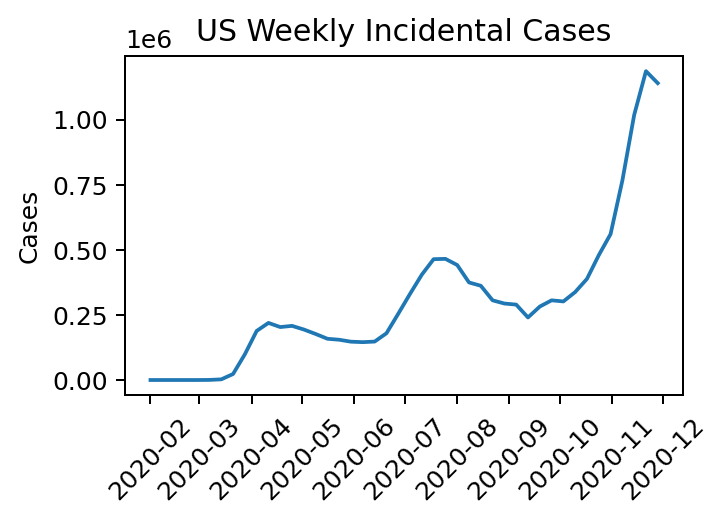

In [7]:
US_cases = S19.readobservedcases()
S19.plotUSIncCases(US_cases,figuresdirectory)

In [8]:
FirstForecasts = S19.getscoreboard(US_cases,'Case','../Data/ScoreboardCases.pkl')
FirstForecasts.to_pickle('../Data/ModelsANDForecasts.pkl')

100%|██████████| 2877/2877 [07:58<00:00,  6.02it/s]


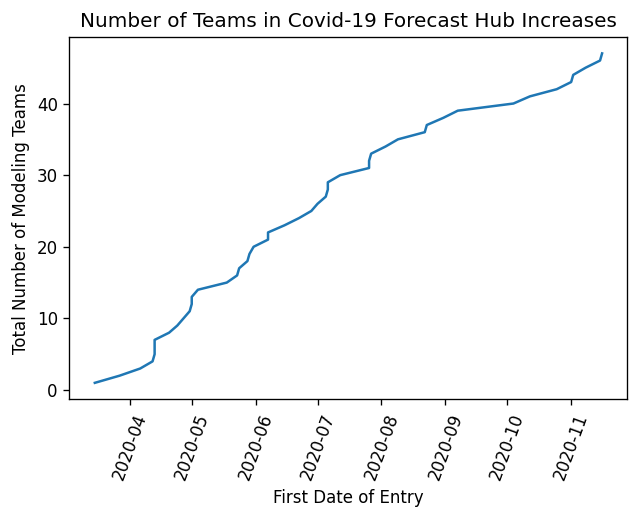

In [7]:
FirstForecasts = pd.read_pickle('../Data/ModelsANDForecasts.pkl')
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
2.2265654794189182
Unique models in the scoreboard:
0. COVIDhub:baseline
1. LANL:GrowthRate
2. OliverWyman:Navigator
3. JHU_IDD:CovidSP
4. IowaStateLW:STEM
5. Covid19Sim:Simulator
6. UCLA:SuEIR
7. Columbia_UNC:SurvCon
8. CovidAnalytics:DELPHI
9. USACE:ERDC_SEIR
10. UMich:RidgeTfReg
11. RobertWalraven:ESG
12. QJHong:Encounter
13. LNQ:ens1
14. IHME:CurveFit
15. COVIDhub:ensemble
16. Karlen:pypm
17. DDS:NBDS
18. CU:nochange
19. CU:select
20. CU:scenario_mid
21. CU:scenario_high
22. CU:scenario_low
23. CEID:Walk
24. JHUAPL:Bucky
25. BPagano:RtDriven
26. JHU_CSSE:DECOM
27. USC:SI_kJalpha_RF
28. JCB:PRM
29. UChicagoCHATTOPADHYAY:UnIT
30. UCF:AEM
31. USC:SI_kJalpha
32. UVA:Ensemble
Models in Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


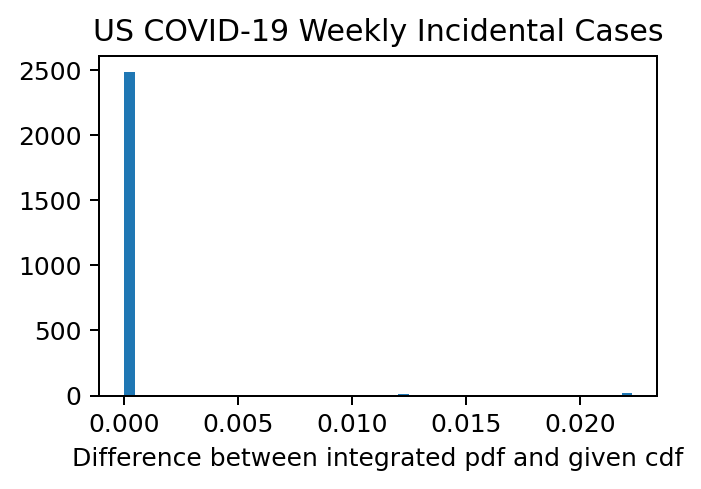

In [8]:
ScoreboardCases = pd.read_pickle('../Data/ScoreboardCases.pkl')
S19.plotdifferencescdfpdf(ScoreboardCases,'Case',figuresdirectory)
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

In [9]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [10]:
#Writing out all the models in the scoreboard into a text file
with open('../INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

Maximum % conversion error:
2.2265654794189182
Unique models in the scoreboard:
0. COVIDhub:baseline
1. LANL:GrowthRate
2. JHU_IDD:CovidSP
3. IowaStateLW:STEM
4. Covid19Sim:Simulator
5. UCLA:SuEIR
6. Columbia_UNC:SurvCon
7. CovidAnalytics:DELPHI
8. USACE:ERDC_SEIR
9. RobertWalraven:ESG
10. LNQ:ens1
11. IHME:CurveFit
12. COVIDhub:ensemble
13. Karlen:pypm
14. DDS:NBDS
15. CU:nochange
16. CU:select
17. CU:scenario_mid
18. CU:scenario_high
19. CU:scenario_low
20. CEID:Walk
21. JHUAPL:Bucky
22. BPagano:RtDriven
23. JHU_CSSE:DECOM
24. USC:SI_kJalpha_RF
25. JCB:PRM
26. UChicagoCHATTOPADHYAY:UnIT
27. UCF:AEM
28. USC:SI_kJalpha
29. UMich:RidgeTfReg
30. UVA:Ensemble
Models in Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


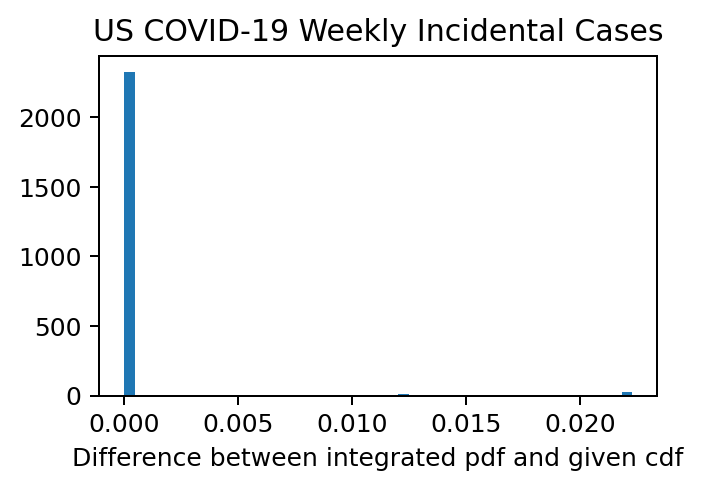

In [9]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardCases[ScoreboardCases["proper"]==False].index
ScoreboardCases.drop(delete_row,inplace=True)
ScoreboardCases.reset_index(drop=True,inplace=True)
S19.plotdifferencescdfpdf(ScoreboardCases,'Case',figuresdirectory)
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

<Figure size 1800x1200 with 0 Axes>

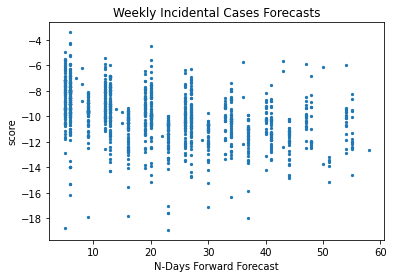

<Figure size 1800x1200 with 0 Axes>

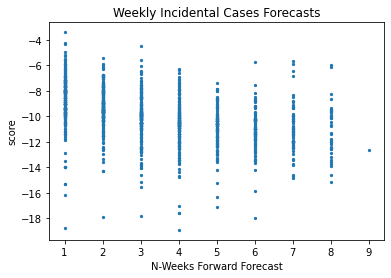

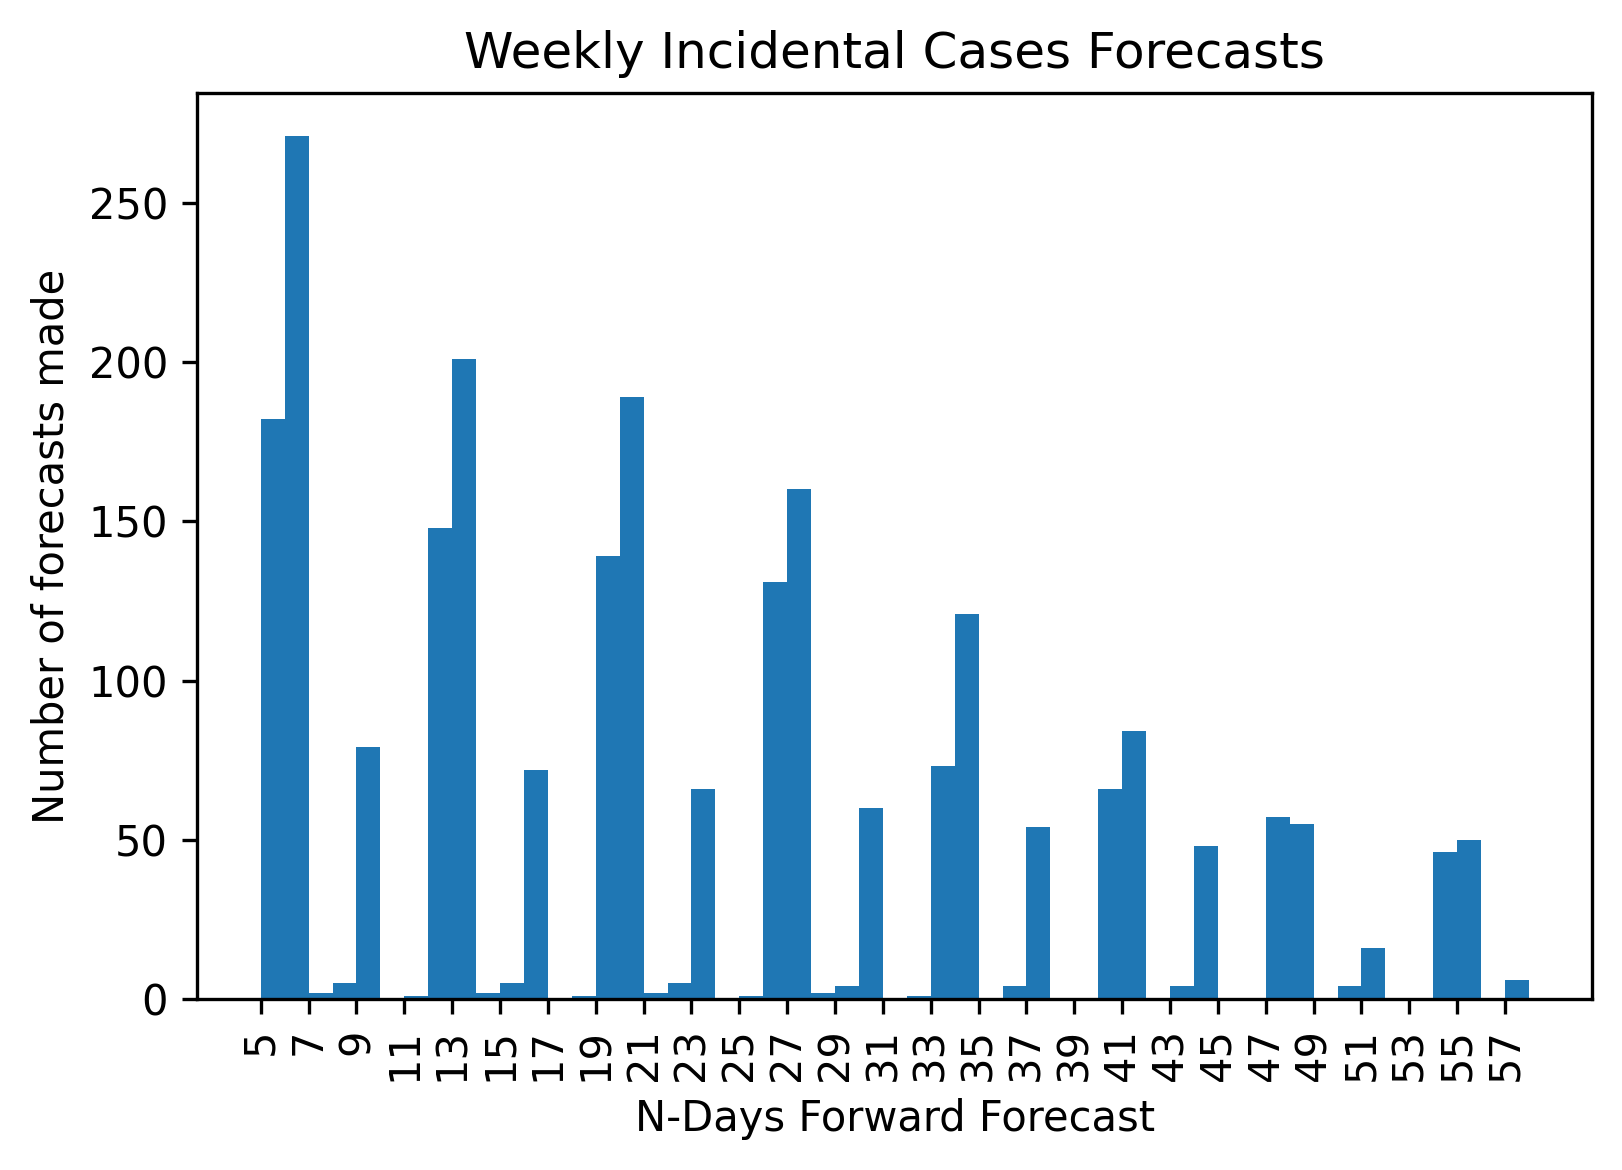

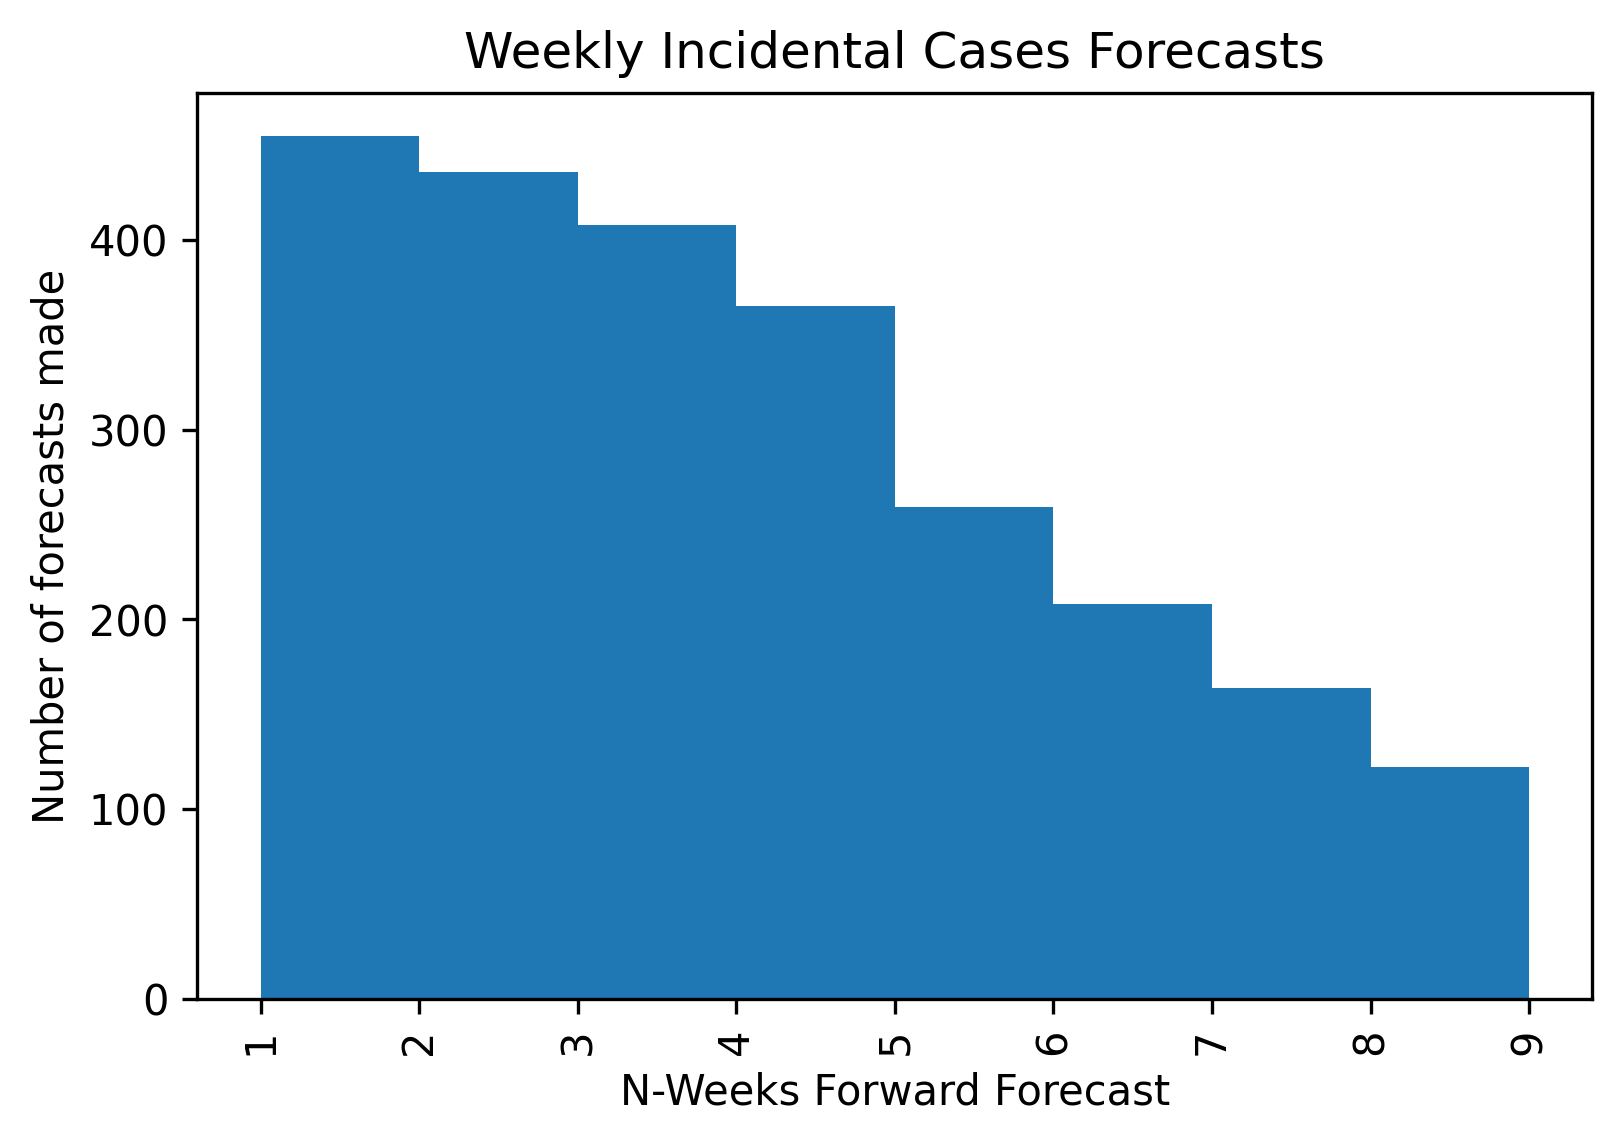

In [8]:
S19.plotallscoresdist(ScoreboardCases,figuresdirectory,'Case')

In [ ]:
int(ScoreboardCases['deltaW'].max())

In [ ]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1)

In [ ]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4)

In [ ]:
#ScoreboardDeaths[ScoreboardDeaths['model']=='BPagano:RtDriven']

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'BPagano:RtDriven')

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:ensemble')

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:baseline')

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'CEID:Walk')

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

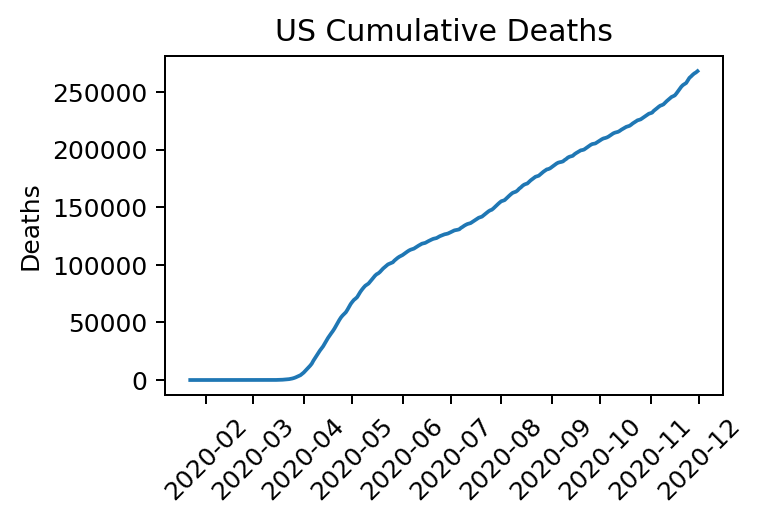

In [10]:
US_deaths = S19.readobserveddeaths()
S19.plotUSCumDeaths(US_deaths,figuresdirectory)

In [ ]:
FirstForecasts = S19.getscoreboard(US_deaths,'Death','../Data/ScoreboardDeaths.pkl')

In [ ]:
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

In [11]:
ScoreboardDeaths = pd.read_pickle('../Data/ScoreboardDeaths.pkl')
#S19.plotdifferencescdfpdf(ScoreboardDeaths,'Death')
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

Unique models in the scoreboard:
0. Imperial:ensemble2
1. Imperial:ensemble1
2. IHME:CurveFit
3. COVIDhub:baseline
4. CU:select
5. CU:scenario_mid
6. CU:scenario_low
7. CU:scenario_high
8. CU:nochange
9. COVIDhub:ensemble
10. MOBS:GLEAM_COVID
11. UMass:ExpertCrowd
12. YYG:ParamSearch
13. UT:Mobility
14. JHU_IDD:CovidSP
15. LANL:GrowthRate
16. CovidAnalytics:DELPHI
17. IowaStateLW:STEM
18. UCLA:SuEIR
19. GT:DeepCOVID
20. UMass:MechBayes
21. PSI:DRAFT
22. UA:EpiCovDA
23. Covid19Sim:Simulator
24. USACE:ERDC_SEIR
25. SWC:TerminusCM
26. Auquan:SEIR
27. CovidActNow:SEIR_CAN
28. OliverWyman:Navigator
29. epiforecasts:ensemble1
30. NotreDame:mobility
31. MITCovAlliance:SIR
32. QJHong:Encounter
33. Columbia_UNC:SurvCon
34. UMich:RidgeTfReg
35. RobertWalraven:ESG
36. Karlen:pypm
37. UCM_MESALab:FoGSEIR
38. DDS:NBDS
39. RPI_UW:Mob_Collision
40. LNQ:ens1
41. CEID:Walk
42. WalmartLabsML:LogForecasting
43. SteveMcConnell:CovidComplete
44. JHUAPL:Bucky
45. UCSD_NEU:DeepGLEAM
46. BPagano:RtDriven
47. 

In [12]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [13]:
#Writing out all the models in the scoreboard into a text file
with open('../CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
1.871678267911725
Unique models in the scoreboard:
0. Imperial:ensemble2
1. Imperial:ensemble1
2. COVIDhub:baseline
3. CU:select
4. CU:scenario_mid
5. CU:scenario_low
6. CU:scenario_high
7. CU:nochange
8. UMass:ExpertCrowd
9. YYG:ParamSearch
10. UT:Mobility
11. JHU_IDD:CovidSP
12. COVIDhub:ensemble
13. MOBS:GLEAM_COVID
14. LANL:GrowthRate
15. CovidAnalytics:DELPHI
16. UCLA:SuEIR
17. GT:DeepCOVID
18. IHME:CurveFit
19. IowaStateLW:STEM
20. UMass:MechBayes
21. PSI:DRAFT
22. UA:EpiCovDA
23. Covid19Sim:Simulator
24. USACE:ERDC_SEIR
25. SWC:TerminusCM
26. Auquan:SEIR
27. CovidActNow:SEIR_CAN
28. OliverWyman:Navigator
29. epiforecasts:ensemble1
30. NotreDame:mobility
31. MITCovAlliance:SIR
32. Columbia_UNC:SurvCon
33. UMich:RidgeTfReg
34. RobertWalraven:ESG
35. Karlen:pypm
36. UCM_MESALab:FoGSEIR
37. DDS:NBDS
38. RPI_UW:Mob_Collision
39. CEID:Walk
40. WalmartLabsML:LogForecasting
41. SteveMcConnell:CovidComplete
42. JHUAPL:Bucky
43. UCSD_NEU:DeepGLEAM
44. BPagano:R

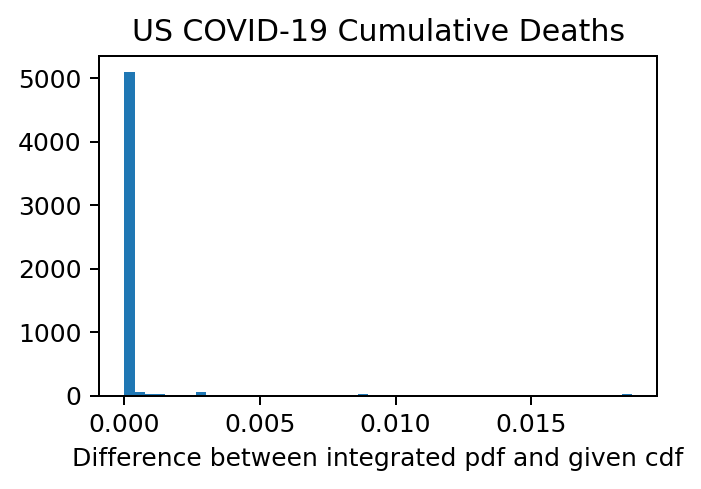

In [12]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardDeaths[ScoreboardDeaths["proper"]==False].index
ScoreboardDeaths.drop(delete_row,inplace=True)
ScoreboardDeaths.reset_index(drop=True,inplace=True)
S19.plotdifferencescdfpdf(ScoreboardDeaths,'Death',figuresdirectory)
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

In [19]:
len(ScoreboardCases)

2358

In [13]:
ScoreboardDeaths['deaths']

0          464
1          464
2         2891
3         2891
4        10892
         ...  
5120    255861
5121    255861
5122    255861
5123    255861
5124    255861
Name: deaths, Length: 5125, dtype: int64

In [9]:
ScoreboardDeaths[ScoreboardDeaths['model']=='BPagano:RtDriven'].tail(3)

,model,forecast_date,delta,target_end_date,quantile,value,deaths,deltaW,proper,score,sumpdf,prange,p,CIHI,CILO,PE,scorecontr
5356,BPagano:RtDriven,2020-11-08,13,2020-11-21,"[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,...","[246599.67521999998, 247756.84866, 248791.3007...",255861,2.0,True,-2.998973,0.979986,0.98,0.000107,262037.73501,246599.67522,254318.70512,4.479389
5359,BPagano:RtDriven,2020-11-08,6,2020-11-14,"[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,...","[241659.07149, 242191.21074, 242666.91519, 243...",245591,1.0,True,-1.347653,0.979969,0.98,0.000249,248758.43725,241659.07149,245208.75437,1.961729
5443,BPagano:RtDriven,2020-11-15,6,2020-11-21,"[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,...","[249915.02874, 250541.25048000002, 251101.0597...",255861,1.0,True,-2.494590,0.979974,0.98,0.000137,258269.56606,249915.02874,254092.29740,3.480914


In [27]:
ScoreboardDeaths.index[ScoreboardDeaths['model'] == 'BPagano:RtDriven'].tolist()

[4103, 4117, 4124, 4132, 4143, 4263, 4284, 4292, 4320, 4427, 4458, 4542, 4610]

BPagano:RtDriven


(array([241660., 241661., 241662., ..., 248754., 248755., 248756.]),
 array([1.54367034e-05, 1.54844412e-05, 1.55480331e-05, ...,
        1.55420304e-05, 1.54781131e-05, 1.54301309e-05]),
 0.9799693125256048,
 0.98)

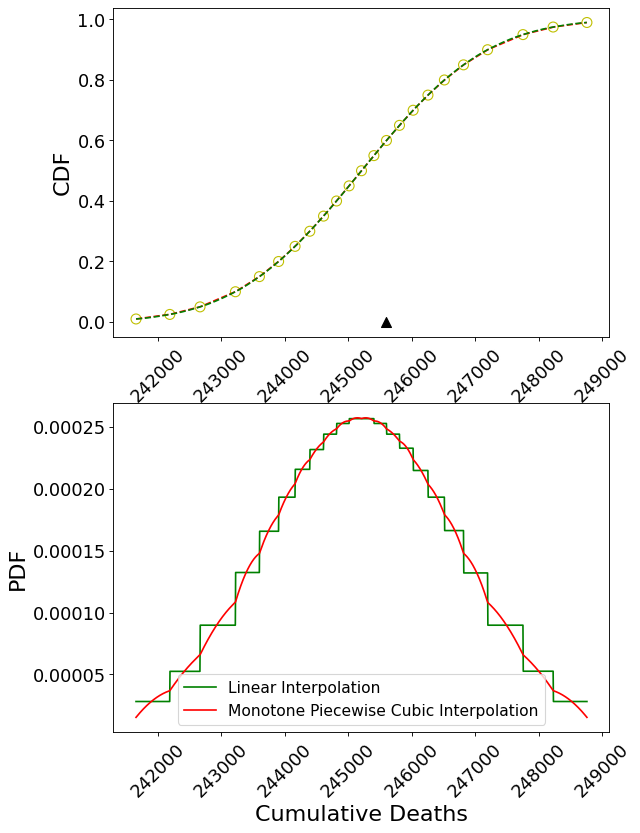

In [8]:
S19.cdfpdf(ScoreboardDeaths,5359,1,True,figuresdirectory)

(737430.7, 737767.3)

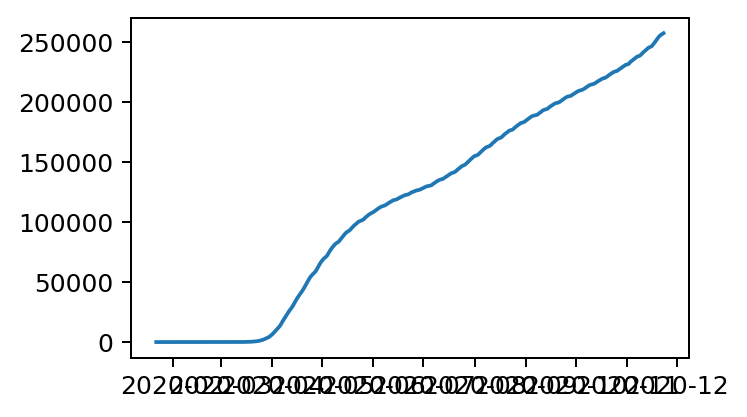

In [18]:
plt.figure(figsize=(4, 2.5), dpi=180, facecolor='w', edgecolor='k')
plt.plot(US_deaths.DateObserved,US_deaths.Deaths)
lims = plt.gca().get_xlim()
plt.gca().set_xlim(xmin=lims[0], xmax=lims[1])


(0.0, 1.0)

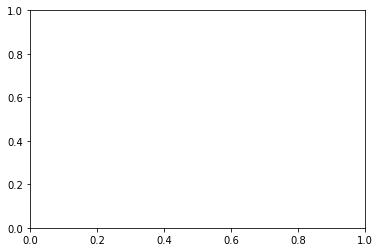

In [19]:
len(ScoreboardDeaths['model'].unique())

50

<Figure size 1800x1200 with 0 Axes>

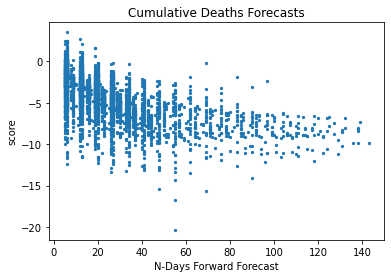

<Figure size 1800x1200 with 0 Axes>

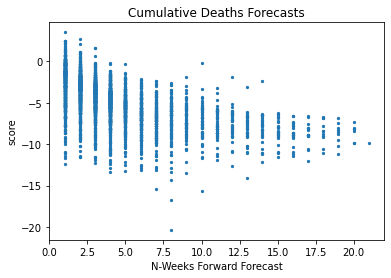

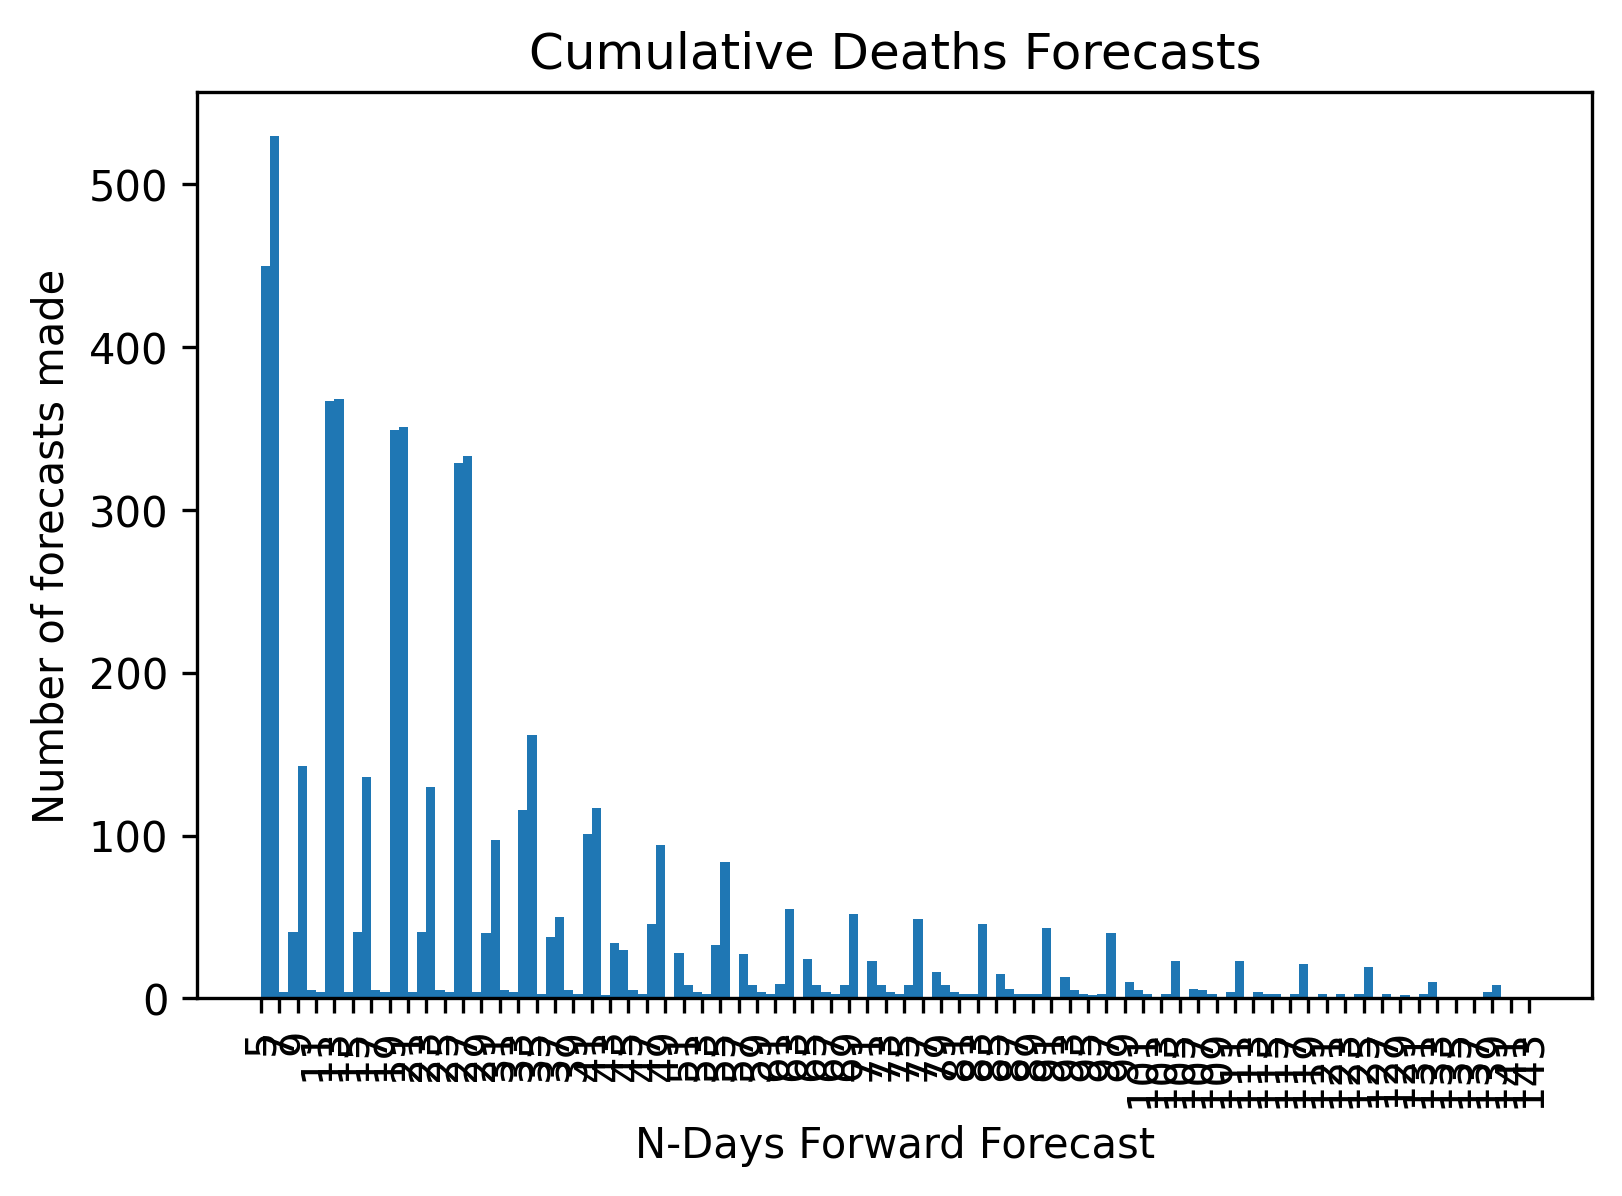

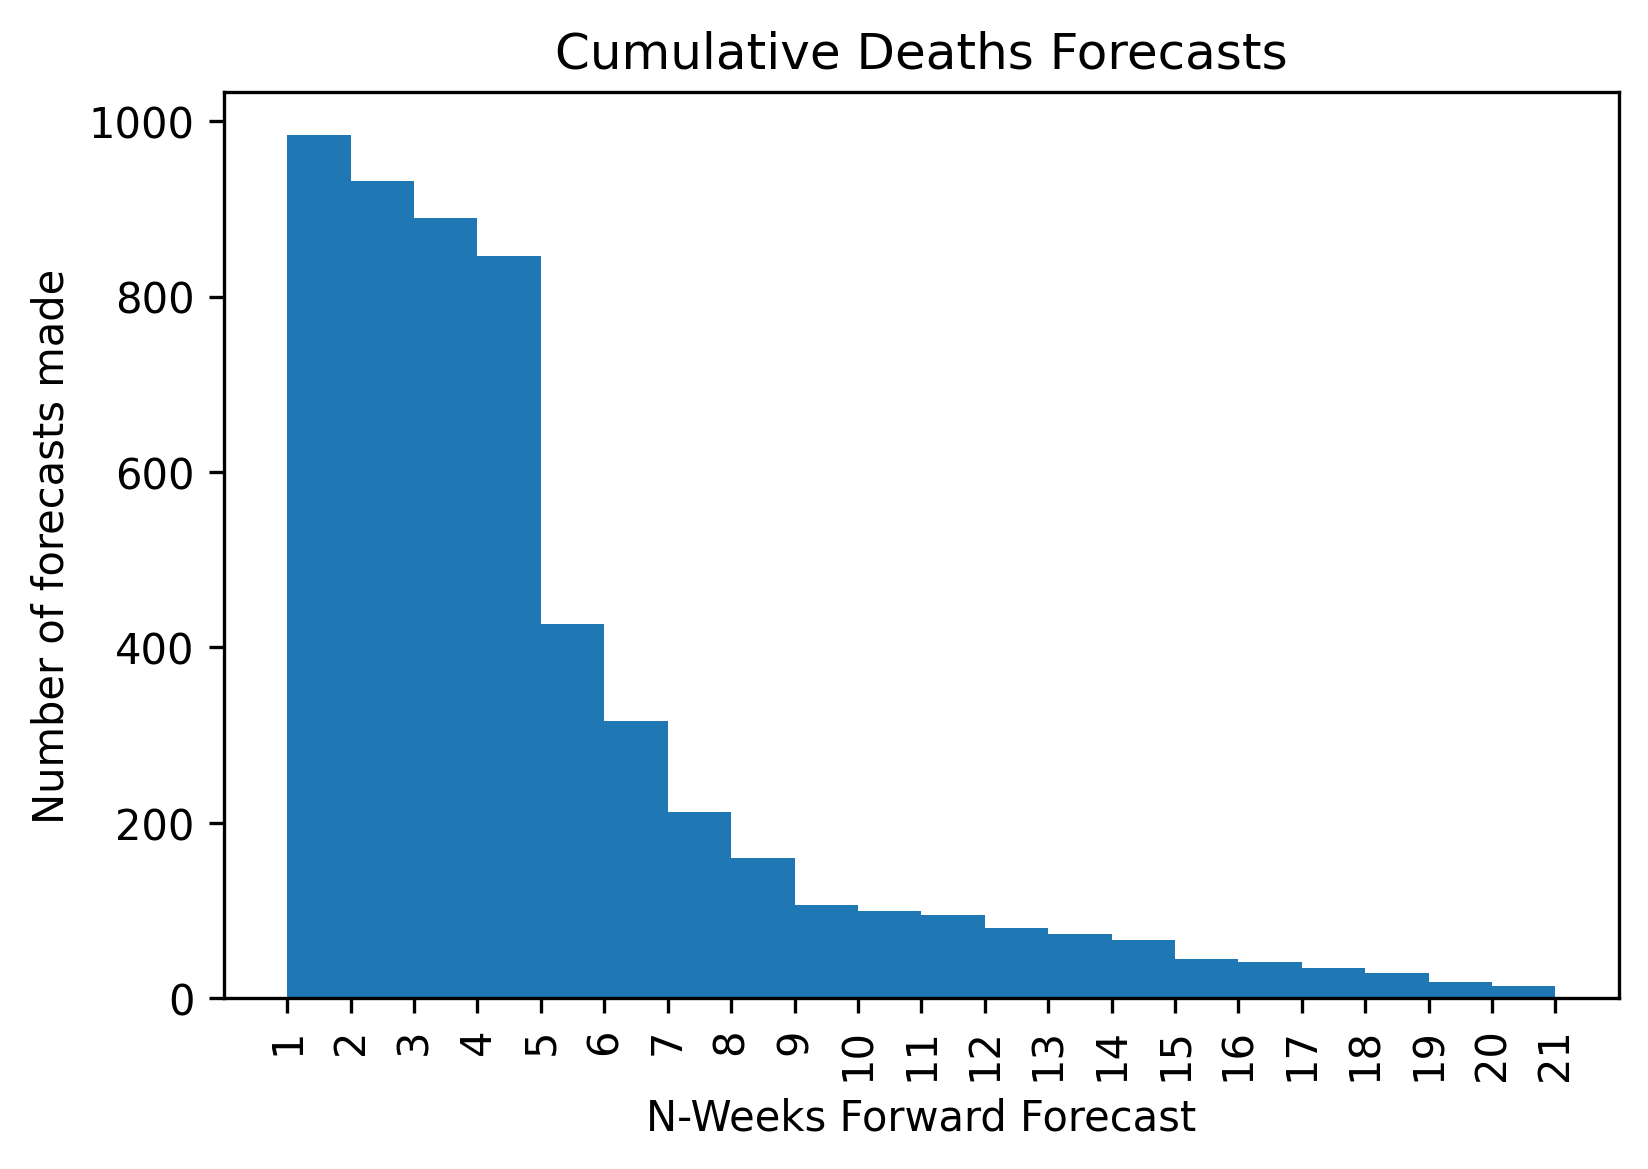

In [10]:
S19.plotallscoresdist(ScoreboardDeaths,figuresdirectory,'Death')

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1)

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4)

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'BPagano:RtDriven')

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'COVIDhub:baseline')

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:baseline')

# Get weighted and unweighted model forecasts

In [ ]:
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'weighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'weighted')
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'unweighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'unweighted')

# UNWEIGHTED FORECASTING

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sunweight')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))


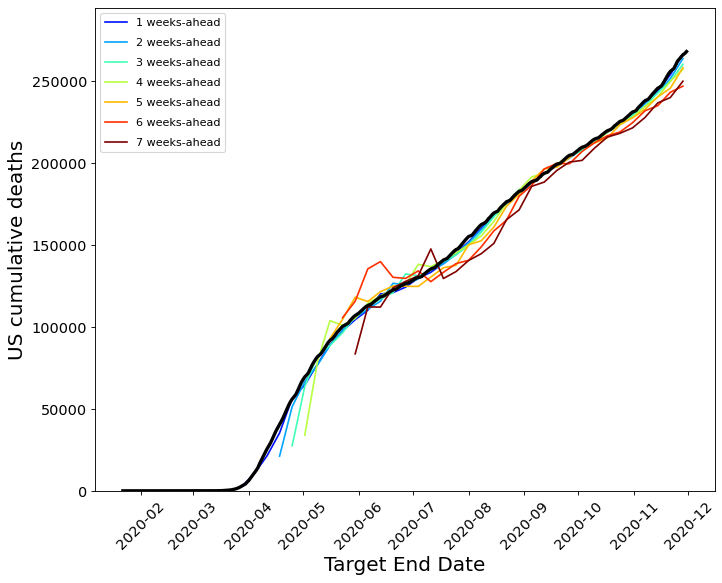

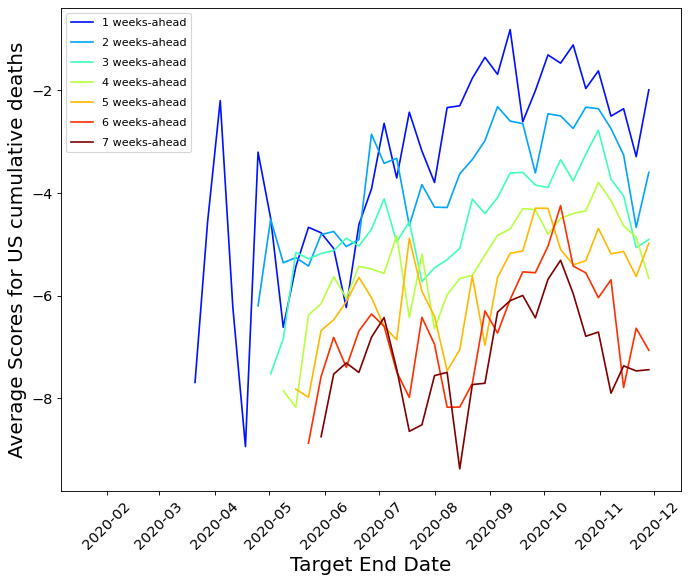

In [13]:
S19.plotlongitudinalUNWEIGHTED(US_deaths,ScoreboardDeaths,'Deaths',7,figuresdirectory)

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sunweight')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19

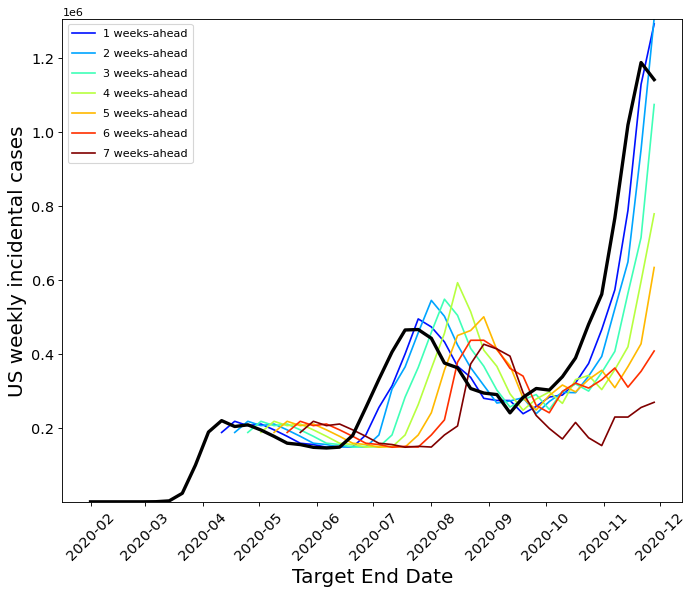

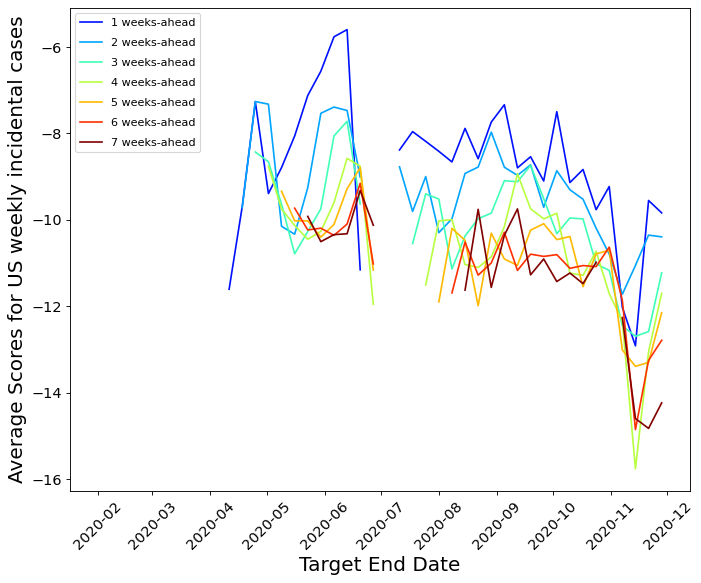

In [14]:
S19.plotlongitudinalUNWEIGHTED(US_cases,ScoreboardCases,'Cases',7,figuresdirectory)

# SCORE-WEIGHTED FORECASTING

## Deaths

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sweight')

## Cases

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sweight')

# ANALYSIS OF SCORES

## Plots by date forecast made

In [27]:
numweeks = 4
Scoreboardx = ScoreboardDeaths[ScoreboardDeaths['deltaW']==numweeks].copy()
(MerdfPRED,pivMerdfPRED) = S19.givePivotScoreTARGET(Scoreboardx, modeltypesDeaths)

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:427: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [28]:
MerdfPRED

,model,modeltype,target_end_date,delta,score,nanmean,nanstd
0,Auquan:SEIR,compartmental,2020-06-27,[27],[-6.83764761928927],-6.837648,0.0
1,Auquan:SEIR,compartmental,2020-07-04,[27],[nan],NaN,NaN
2,Auquan:SEIR,compartmental,2020-07-11,[26],[-10.598132653817654],-10.598133,0.0
3,Auquan:SEIR,compartmental,2020-07-18,[27],[-11.26949918937353],-11.269499,0.0
4,Auquan:SEIR,compartmental,2020-07-25,[27],[-7.027291320219304],-7.027291,0.0
...,...,...,...,...,...,...,...
835,epiforecasts:ensemble1,ensemble,2020-10-31,[26],[nan],NaN,NaN
836,epiforecasts:ensemble1,ensemble,2020-11-07,[26],[-3.8513912041481033],-3.851391,0.0
837,epiforecasts:ensemble1,ensemble,2020-11-14,[26],[-6.577924419382859],-6.577924,0.0
838,epiforecasts:ensemble1,ensemble,2020-11-21,[26],[-7.4926256263104625],-7.492626,0.0


In [31]:
pivMerdfPRED.mean(axis=1)

target_end_date
2020-05-02         NaN
2020-05-09   -7.849508
2020-05-16   -8.170820
2020-05-23   -6.378087
2020-05-30   -6.159143
2020-06-06   -5.633252
2020-06-13   -6.050788
2020-06-20   -5.431694
2020-06-27   -5.484062
2020-07-04   -5.567285
2020-07-11   -4.833189
2020-07-18   -6.427826
2020-07-25   -5.193942
2020-08-01   -6.645418
2020-08-08   -5.984276
2020-08-15   -5.670409
2020-08-22   -5.605075
2020-08-29   -5.212129
2020-09-05   -4.829426
2020-09-12   -4.703957
2020-09-19   -4.308435
2020-09-26   -4.329911
2020-10-03   -4.806661
2020-10-10   -4.499833
2020-10-17   -4.402758
2020-10-24   -4.353062
2020-10-31   -3.800083
2020-11-07   -4.149549
2020-11-14   -4.643988
2020-11-21   -4.866707
2020-11-28   -5.664925
dtype: float64

In [32]:
pivMerdfPRED.

model,Auquan:SEIR,BPagano:RtDriven,CEID:Walk,COVIDhub:baseline,COVIDhub:ensemble,CU:nochange,CU:scenario_high,CU:scenario_low,CU:scenario_mid,CU:select,...,UCM_MESALab:FoGSEIR,UCSD_NEU:DeepGLEAM,UMass:MechBayes,UMich:RidgeTfReg,USACE:ERDC_SEIR,USC:SI_kJalpha_RF,UT:Mobility,WalmartLabsML:LogForecasting,YYG:ParamSearch,epiforecasts:ensemble1
target_end_date,,,,,,,,,,,,,,,,,,,,,
2020-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-09,NaN,NaN,NaN,-8.491552,NaN,-7.957294,-7.347818,-8.141382,-8.065136,-8.065136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.878239,NaN
2020-05-16,NaN,NaN,NaN,-8.246053,NaN,-8.550882,-7.595184,-6.089950,-6.519338,-6.519338,...,NaN,NaN,NaN,NaN,NaN,NaN,-12.900043,NaN,-6.101277,NaN
2020-05-23,NaN,NaN,NaN,-7.328403,-7.195570,NaN,NaN,-3.532650,-4.788791,-4.788791,...,NaN,NaN,NaN,NaN,NaN,NaN,-13.328035,NaN,-6.166139,NaN
2020-05-30,NaN,NaN,NaN,-7.194429,-6.199237,NaN,-5.404870,-5.650097,-5.045681,-5.045681,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.310948,NaN,-5.552632,NaN
2020-06-06,NaN,NaN,NaN,-8.388204,-5.494846,NaN,-5.146622,-5.079482,-5.255872,-5.255872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.709239,NaN
2020-06-13,NaN,NaN,NaN,-7.024243,-5.674210,NaN,-4.679701,-5.173646,-5.457910,-5.457910,...,NaN,NaN,-5.506368,NaN,NaN,NaN,NaN,NaN,-5.547768,NaN
2020-06-20,NaN,NaN,NaN,-6.630205,-4.574084,NaN,-5.212587,-5.784735,-5.473324,-5.473324,...,NaN,NaN,-5.159624,NaN,-7.282092,NaN,-2.629360,NaN,-5.191564,NaN
2020-06-27,-6.837648,NaN,NaN,-5.956467,-4.753845,-4.489591,-4.496973,-4.341097,-3.818776,-3.818776,...,NaN,NaN,-5.310466,NaN,-7.387618,NaN,-6.685945,NaN,-4.538760,NaN


In [ ]:
items=['one', 'three']

In [44]:
selectmodels = modeltypesDeaths['modeltype'].unique().tolist()
for selectmodel in selectmodels:
    models = modeltypesDeaths[modeltypesDeaths['modeltype']==selectmodel].model.tolist()
    pivMerdfPRED[selectmodel] = pivMerdfPRED.filter(items=models).mean(axis=1)

In [45]:
pivMerdfPRED

model,Auquan:SEIR,BPagano:RtDriven,CEID:Walk,COVIDhub:baseline,COVIDhub:ensemble,CU:nochange,CU:scenario_high,CU:scenario_low,CU:scenario_mid,CU:select,...,USC:SI_kJalpha_RF,UT:Mobility,WalmartLabsML:LogForecasting,YYG:ParamSearch,epiforecasts:ensemble1,anan,compartmental,metapopulation,stat&prob,ensemble
target_end_date,,,,,,,,,,,,,,,,,,,,,
2020-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-09,NaN,NaN,NaN,-8.491552,NaN,-7.957294,-7.347818,-8.141382,-8.065136,-8.065136,...,NaN,NaN,NaN,-6.878239,NaN,NaN,NaN,-7.915354,-7.684896,NaN
2020-05-16,NaN,NaN,NaN,-8.246053,NaN,-8.550882,-7.595184,-6.089950,-6.519338,-6.519338,...,NaN,-12.900043,NaN,-6.101277,NaN,NaN,NaN,-7.715002,-7.173665,-12.900043
2020-05-23,NaN,NaN,NaN,-7.328403,-7.195570,NaN,NaN,-3.532650,-4.788791,-4.788791,...,NaN,-13.328035,NaN,-6.166139,NaN,-4.662139,-4.662139,-4.370077,-6.940918,-10.261802
2020-05-30,NaN,NaN,NaN,-7.194429,-6.199237,NaN,-5.404870,-5.650097,-5.045681,-5.045681,...,NaN,-8.310948,NaN,-5.552632,NaN,-5.264299,-5.264299,-5.716347,-6.464785,-7.255093
2020-06-06,NaN,NaN,NaN,-8.388204,-5.494846,NaN,-5.146622,-5.079482,-5.255872,-5.255872,...,NaN,NaN,NaN,-5.709239,NaN,-5.407834,-5.407834,-5.233072,-6.106196,-5.494846
2020-06-13,NaN,NaN,NaN,-7.024243,-5.674210,NaN,-4.679701,-5.173646,-5.457910,-5.457910,...,NaN,NaN,NaN,-5.547768,NaN,-5.121700,-5.121700,-6.083539,-6.830072,-5.674210
2020-06-20,NaN,NaN,NaN,-6.630205,-4.574084,NaN,-5.212587,-5.784735,-5.473324,-5.473324,...,NaN,-2.629360,NaN,-5.191564,NaN,-5.502911,-5.502911,-5.345800,-6.030176,-3.601722
2020-06-27,-6.837648,NaN,NaN,-5.956467,-4.753845,-4.489591,-4.496973,-4.341097,-3.818776,-3.818776,...,NaN,-6.685945,NaN,-4.538760,NaN,-6.285960,-6.285960,-4.349179,-5.468553,-5.719895


In [ ]:
S19.plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 1, 'Death')

In [ ]:
S19.plotgroupsFD(ScoreboardCases, modeltypesCases, figuresdirectory, 1, 'Case')

## Plots by target end date

In [ ]:
S19.plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 'Death')

In [ ]:
S19.plotgroupsTD(ScoreboardCases, modeltypesCases, figuresdirectory, 'Case')

### ADD TO GITHUB

In [ ]:
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
#!git stash
#!git pull --rebase origin master
!git add --all
!git commit -am “Update”
!git push -u origin master
os.chdir(mypwd[0])

In [16]:
#Read Observed Cases
address = 'https://raw.githubusercontent.com/reichlab/covid19-forecast-hub/master/data-truth/truth-Cumulative%20Cases.csv'
dfOBS = pd.read_csv(address,
                    dtype = {'location': str},parse_dates=['date'],
                    na_values = ['NA', 'no info', '.'])
US_cases = dfOBS.copy()    
US_cases = US_cases[(dfOBS['location_name'] == 'US')]
US_cases = US_cases.drop(columns=['location', 'location_name'])
US_cases.columns = ['DateObserved', 'Cases']
US_cases.reset_index(inplace=True,drop=True)

#Convert from daily to  weekly measured from Sun-Sat
WeeklyUS_cases = US_cases.iloc[np.arange(US_cases[US_cases["DateObserved"]=="2020-01-25"].index[0],
                                         len(US_cases),7)].copy()
WeeklyUS_cases['Cases'] = WeeklyUS_cases.Cases.diff()
WeeklyUS_cases.reset_index(drop=True, inplace=True)

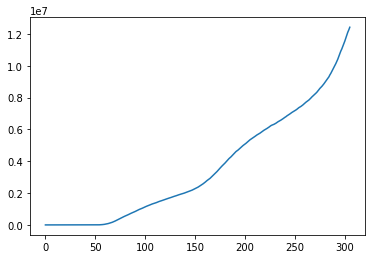

In [24]:
plt.plot(US_cases['Cases'])

In [20]:
US_cases.head(18)

,DateObserved,Cases
0,2020-01-23,1
1,2020-01-24,2
2,2020-01-25,2
3,2020-01-26,5
4,2020-01-27,5
5,2020-01-28,5
6,2020-01-29,6
7,2020-01-30,6
8,2020-01-31,8
9,2020-02-01,8


In [19]:
WeeklyUS_cases.head(3)

,DateObserved,Cases
0,2020-01-25,NaN
1,2020-02-01,6.0
2,2020-02-08,4.0


In [8]:
dfPREDx = pd.read_csv('../Data/all_dataONY.csv',
                     na_values = ['NA', 'no info', '.'], parse_dates=True)
dfPREDx.drop_duplicates(subset=None, keep = 'first', inplace = True)

In [19]:
datess = datetime.strptime('Nov 28 2020', '%b %d %Y')
#[dfPREDx['target_end_date']==datess]
dfPREDx[dfPREDx['target']=='1 wk ahead cum death'].sort_values('value').head(50)

,team,model,forecast_date,target,quantile,value,target_end_date
784583,Covid19Sim,Simulator,2020-11-22,1 wk ahead cum death,0.010,20.378751,2020-11-28
788572,Covid19Sim,Simulator,2020-11-29,1 wk ahead cum death,0.010,23.455292,2020-12-05
531422,Imperial,ensemble1,2020-03-15,1 wk ahead cum death,0.010,77.000000,2020-03-21
531423,Imperial,ensemble1,2020-03-15,1 wk ahead cum death,0.025,85.000000,2020-03-21
531424,Imperial,ensemble1,2020-03-15,1 wk ahead cum death,0.050,94.000000,2020-03-21
531560,Imperial,ensemble2,2020-03-15,1 wk ahead cum death,0.010,98.000000,2020-03-21
531425,Imperial,ensemble1,2020-03-15,1 wk ahead cum death,0.100,109.000000,2020-03-21
531561,Imperial,ensemble2,2020-03-15,1 wk ahead cum death,0.025,109.000000,2020-03-21
531562,Imperial,ensemble2,2020-03-15,1 wk ahead cum death,0.050,120.000000,2020-03-21
531426,Imperial,ensemble1,2020-03-15,1 wk ahead cum death,0.150,123.000000,2020-03-21


In [16]:
datess

datetime.datetime(2020, 11, 28, 0, 0)

In [25]:
temp = US_cases.iloc[np.arange(US_cases[US_cases["DateObserved"]=="2020-01-25"].index[0],
                                         len(US_cases),7)].copy()
temp

,DateObserved,Cases
2,2020-01-25,2
9,2020-02-01,8
16,2020-02-08,12
23,2020-02-15,14
30,2020-02-22,16
37,2020-02-29,25
44,2020-03-07,403
51,2020-03-14,2986
58,2020-03-21,26043
65,2020-03-28,124900


In [26]:
dfPREDx = pd.read_csv('../Data/all_dataONY.csv',
                     na_values = ['NA', 'no info', '.'], parse_dates=True)
dfPREDx.drop_duplicates(subset=None, keep = 'first', inplace = True)

In [33]:
np.sort(dfPREDx['team'].unique())

array(['Auquan', 'BPagano', 'CEID', 'COVIDhub', 'CU', 'Columbia_UNC',
       'Covid19Sim', 'CovidActNow', 'CovidAnalytics', 'DDS', 'GT', 'IHME',
       'Imperial', 'IowaStateLW', 'JCB', 'JHUAPL', 'JHU_CSSE', 'JHU_IDD',
       'Karlen', 'LANL', 'LNQ', 'MITCovAlliance', 'MOBS', 'MSRA',
       'NotreDame', 'OliverWyman', 'PSI', 'QJHong', 'RPI_UW',
       'RobertWalraven', 'SWC', 'SteveMcConnell', 'UA', 'UCF', 'UCLA',
       'UCM_MESALab', 'UCSD_NEU', 'UChicagoCHATTOPADHYAY', 'UMass',
       'UMich', 'USACE', 'USC', 'UT', 'UVA', 'WalmartLabsML', 'YYG',
       'epiforecasts'], dtype=object)